In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk.corpus as corpus
import nltk

In [32]:
data=pd.read_csv("mark.csv")

In [33]:
def get_count(x):
    return len(nltk.word_tokenize(x))
data['len']=data['Text'].map(get_count)

In [34]:
data.head()

,Person,Text,len
0,GRASSLEY:,I'll start with you.\r\n\r\nFacebook handles ...,139
1,ZUCKERBERG:,"Mr. Chairman, thank you.\r\n\r\nAs I mentione...",166
2,GRASSLEY:,OK (ph).\r\n\r\nHave you ever required an aud...,29
3,ZUCKERBERG:,"Mr. Chairman, yes we have. I don't have the e...",143
4,GRASSLEY:,"I was going to assume that, sitting here toda...",55


# marks response

In [35]:
print("The total words spoken by Mark were {} words".format(data.query("Person=='ZUCKERBERG:'")['len'].sum()))
print("The average length of his response weas {} words".format(round(data.query("Person=='ZUCKERBERG:'")['len'].mean(),2)))
print("The maximum length of Mark's response was {} words".format(data.query("Person=='ZUCKERBERG:'")['len'].max()))

The total words spoken by Mark were 19959 words
The average length of his response weas 51.71 words
The maximum length of Mark's response was 524 words


# which senator spoke most

Text(0.5,0,'Count')

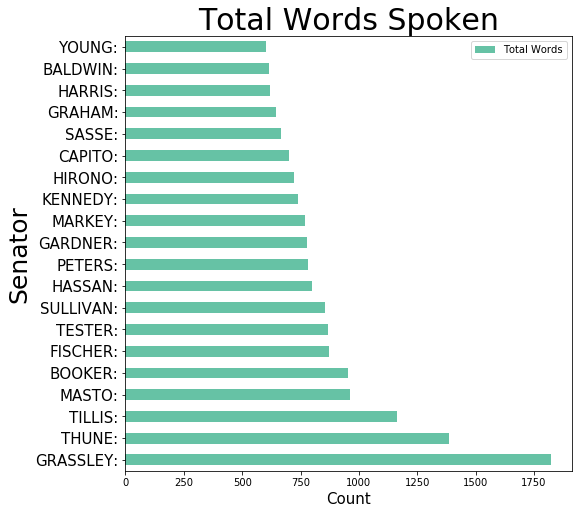

In [37]:
data.query("Person !='ZUCKERBERG:'").groupby("Person").sum().rename(columns={'len':'Total Words'}).sort_values("Total Words",ascending=False).head(20).plot(kind="barh",colormap="Set2",figsize=(8,8))
plt.title("Total Words Spoken",fontsize=30)
plt.ylabel("Senator",fontsize=25)
plt.yticks(fontsize=15)
plt.xlabel("Count",fontsize=15)

In [38]:
##  Most commonly used words by Mark
from sklearn.feature_extraction import text
def get_imp(bow,mf,ngram):
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english')
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)

# most common bigrams

In [39]:
mark=data[data['Person']=="ZUCKERBERG:"]['Text'].tolist()
get_imp(mark,mf=5000,ngram=2).head(10)


make sure              31
senator think          29
yes senator            18
cambridge analytica    17
senator yes            14
senator don            12
don know               11
making sure            11
team follow            11
app developer          10
dtype: int64

# most common trigrams

In [40]:
get_imp(mark,mf=5000,ngram=3).head(10)

want make sure                    8
senator don know                  5
security content review           5
20 000 people                     5
going 20 000                      4
app access large                  4
working security content          4
foreign interference elections    4
don sell data                     3
single app access                 3
dtype: int64

In [41]:
def get_imp_tf(bow,mf,ngram):
    tfidf=text.TfidfVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english')
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)

# common bigrams

In [42]:
get_imp_tf(mark,mf=5000,ngram=2).head(10)


senator yes            4.427712
senator think          4.278710
yes senator            4.127852
senator believe        3.834089
make sure              3.620440
senator don            2.736966
team follow            2.645200
don know               2.490640
cambridge analytica    2.239803
senator know           2.201193
dtype: float64

# common trigrams

In [43]:
get_imp_tf(mark,mf=5000,ngram=3).head(10)

senator don know              1.772555
want make sure                1.681610
forward having team           1.172937
look forward having           1.172937
senator look forward          1.129662
team follow information       1.110503
believe government ability    1.000000
commit political view         1.000000
certainly want case           1.000000
options yes cortez            1.000000
dtype: float64